<a href="https://colab.research.google.com/github/zubeydeulukok/CNN_Projects/blob/main/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Authentication Process

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
!pwd
!ls

/gdrive
MyDrive


In [3]:
import os

os.chdir('/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognition')
!pwd
!ls

/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognition
data  Facial_Expression_Recognition.ipynb  fer2013


In [4]:
!tar -vxf 'data/fer2013.tar.gz'

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


# Import Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

# Recognizing and Understanding Data

In [6]:
root = '/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognition'
# read the dataset
data = pd.read_csv(root + '/fer2013/fer2013.csv')
data.shape

(35887, 3)

In [7]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [10]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [11]:
np.unique(data["Usage"].values, return_counts=True)

(array(['PrivateTest', 'PublicTest', 'Training'], dtype=object),
 array([ 3589,  3589, 28709]))

## Train Set Preprocess

In [12]:
train_data = data [data.Usage == "Training"]
train_data.shape

(28709, 3)

### Images in Train Set

In [13]:
train_data["pixels"][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [14]:
X = train_data["pixels"].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(28709, 48, 48, 1)

In [15]:
train_pixels = train_data.pixels.str.split(" ").tolist() 
train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_pixels

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,84,85,85,85,85,85,85,85,86,86,...,35,34,35,36,40,27,125,231,215,200
28705,114,112,113,113,111,111,112,113,115,113,...,83,94,107,120,141,144,132,129,182,222
28706,74,81,87,89,95,100,98,93,105,120,...,211,214,211,209,200,195,192,188,187,187
28707,222,227,203,90,86,90,84,77,94,87,...,136,139,141,145,137,139,136,136,136,134


In [16]:
train_images = train_pixels.values
train_images = train_images.astype(float)
train_images, train_images.shape

(array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
        [151., 150., 147., ..., 193., 183., 184.],
        [231., 212., 156., ...,  88., 110., 152.],
        ...,
        [ 74.,  81.,  87., ..., 188., 187., 187.],
        [222., 227., 203., ..., 136., 136., 134.],
        [195., 199., 205., ...,   6.,  15.,  38.]]), (28709, 2304))

In [17]:
train_images[0],train_images[0].reshape(48,48)

(array([ 70.,  80.,  82., ..., 106., 109.,  82.]),
 array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]]))

In [18]:
# Define a function to show images in format 48x48
def show(img):
    show_image = img.reshape(48,48)
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

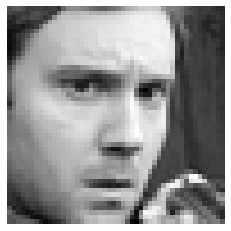

In [19]:
show(train_images[0])

### Classes in Train Dataset

In [20]:
train_data["emotion"].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [21]:
np.unique(train_data["emotion"]).shape

(7,)

In [22]:
np.unique(train_data["emotion"].values, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3995,  436, 4097, 7215, 4830, 3171, 4965]))

In [23]:
emotion_list = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')

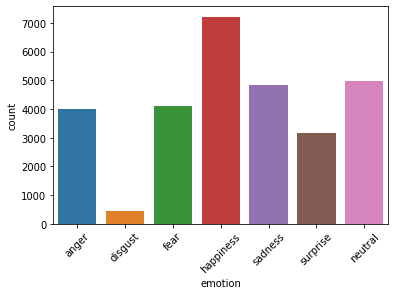

In [24]:
import seaborn as sns
sns.countplot(x="emotion", data=train_data)
plt.xticks(range(7), emotion_list, rotation=45);

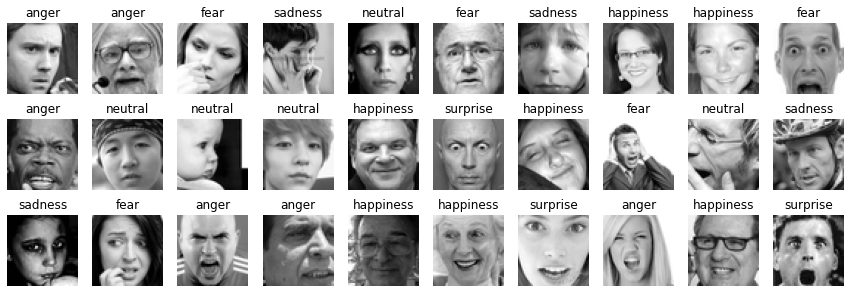

In [25]:
plt.figure(figsize=(15,5))
x, y =10, 3
for i in range(30):
  plt.subplot(y, x, i+1)
  show(train_images[i])
  plt.title(emotion_list[data["emotion"][i]])
  plt.axis("off")

In [26]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# img_labels = le.fit_transform(train_data["emotion"])
# img_labels = to_categorical(img_labels)
# img_labels.shape

In [27]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_data["emotion"], 7)
y_train, y_train.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32), (28709, 7))

In [28]:
from sklearn.preprocessing import LabelBinarizer

labelbinarizer = LabelBinarizer()

Y_train = labelbinarizer.fit_transform(train_data["emotion"])
Y_train, Y_train.shape

(array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]]), (28709, 7))

In [29]:
(Y_train==y_train.astype(float)).all()

True

## Validation Set Preprocess

In [30]:
test_data = data [data.Usage == "PublicTest"]
test_data.shape

(3589, 3)

### Images in Train Set

In [31]:
test_data["pixels"]

28709    254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710    156 184 198 202 204 207 210 212 213 214 215 21...
28711    69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712    205 203 236 157 83 158 120 116 94 86 155 180 2...
28713    87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
                               ...                        
32293    178 176 172 173 173 174 176 173 166 166 206 22...
32294    25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...
32295    255 255 255 255 255 255 255 255 255 255 255 25...
32296    33 25 31 36 36 42 69 103 132 163 175 183 187 1...
32297    61 63 59 75 151 159 166 161 143 170 127 131 18...
Name: pixels, Length: 3589, dtype: object

In [32]:
test_pixels = test_data.pixels.str.split(" ").tolist() 
test_pixels = pd.DataFrame(test_pixels, dtype=int)

test_images = test_pixels.values
test_images = test_images.astype(float)
test_images, test_images.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


(array([[254., 254., 254., ...,  42., 129., 180.],
        [156., 184., 198., ..., 172., 167., 161.],
        [ 69., 118.,  61., ...,  88.,  87.,  90.],
        ...,
        [255., 255., 255., ...,  48.,  50.,  46.],
        [ 33.,  25.,  31., ...,   4.,   5.,   4.],
        [ 61.,  63.,  59., ..., 113., 165., 180.]]), (3589, 2304))

In [33]:
test_images[0].reshape(48,48)  # a test image

array([[254., 254., 254., ...,  16.,   0., 161.],
       [254., 254., 254., ...,  17.,   0., 122.],
       [254., 254., 254., ...,  26.,   0., 114.],
       ...,
       [ 66.,  86.,  99., ..., 255., 252., 254.],
       [ 84.,  92.,  92., ..., 236., 255., 255.],
       [ 93.,  90.,  85., ...,  42., 129., 180.]])

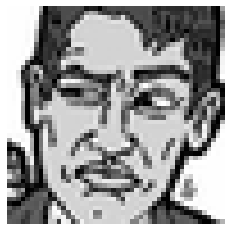

In [34]:
# an example from test image set
show(test_images[0])

### Classes in Test Dataset

In [35]:
test_data["emotion"].value_counts()

3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64

In [36]:
np.unique(test_data["emotion"]).shape

(7,)

In [37]:
np.unique(test_data["emotion"].values, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([467,  56, 496, 895, 653, 415, 607]))

In [38]:
emotion_list = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')

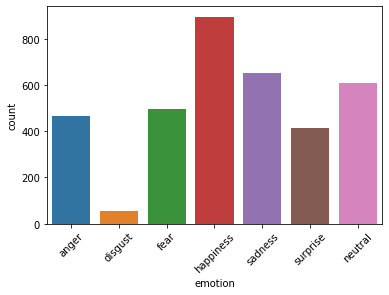

In [39]:
import seaborn as sns
sns.countplot(x="emotion", data=test_data)
plt.xticks(range(7), emotion_list, rotation=45);

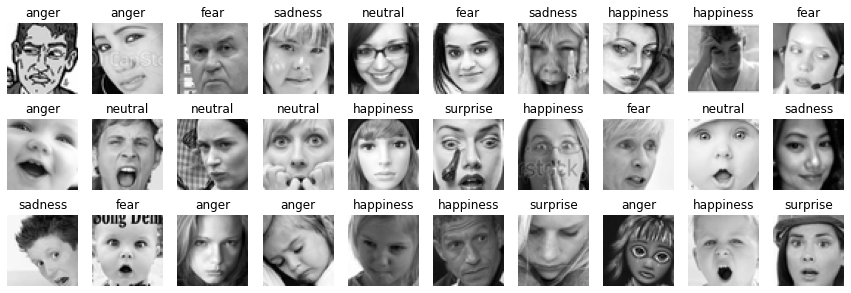

In [40]:
# Sample images from the test set
plt.figure(figsize=(15,5))
x, y =10, 3
for i in range(30):
  plt.subplot(y, x, i+1)
  show(test_images[i])
  plt.title(emotion_list[data["emotion"][i]])
  plt.axis("off")

In [41]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# img_labels = le.fit_transform(train_data["emotion"])
# img_labels = to_categorical(img_labels)
# img_labels.shape

In [42]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(test_data["emotion"], 7)
y_test, y_test.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32), (3589, 7))

In [43]:
from sklearn.preprocessing import LabelBinarizer

labelbinarizer = LabelBinarizer()

Y_test = labelbinarizer.fit_transform(test_data["emotion"])
Y_test, Y_test.shape

(array([[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]]), (3589, 7))

In [44]:
(Y_test==y_test.astype(float)).all()

True

In [45]:
train_images.shape

(28709, 2304)

# Model-1 Architecture

In [46]:
model = Sequential()

#1.Layer
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. layer
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6))

### 3. layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))


### 4.layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

### 5.layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6))

### Fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

### output layer
model.add(Dense(7))
model.add(Activation('softmax'))  # classifier

# compile the model
# specify the optimization and evaluation metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# visaulising model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 44, 44, 64)        0

**Let's print the number of elements, height and width, number of channels of the Training and Test sets to the screen.**

In [47]:
train_images.shape

(28709, 2304)

In [48]:
x_train = train_images.reshape(-1,48,48,1)
x_test = test_images.reshape(-1,48,48,1)

In [49]:
print("There are ", len(x_train), "images in the training dataset and shape: ", x_train.shape)     
print("There are ", len(x_test), "images in the test dataset and shape: ", x_test.shape)

There are  28709 images in the training dataset and shape:  (28709, 48, 48, 1)
There are  3589 images in the test dataset and shape:  (3589, 48, 48, 1)


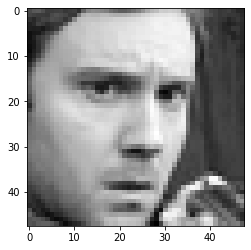

In [50]:
plt.imshow(x_train[0].reshape(48,48),  cmap='gray')

**The number of elements and emotion classes of the Training and Test sets.**

In [51]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [52]:
root

'/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognition'

## Model Fitting

In [53]:
# save the most successful weights
checkpointer = ModelCheckpoint(filepath=root + 'face_model.h5', verbose=1, save_best_only=True)

epochs = 50
batch_size = 128

# fit the model
hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 shuffle=True,  # let's get the images mixed up
                 batch_size=batch_size,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], # 
                 verbose=2
                 )
                
# save model to json
model_json = model.to_json()
with open(root + 'face_model.json', 'w') as json_file:
  json_file.write(model_json)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.65529, saving model to /gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognitionface_model.h5
225/225 - 21s - loss: 2.0341 - accuracy: 0.2474 - val_loss: 1.6553 - val_accuracy: 0.3586 - 21s/epoch - 92ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1.65529 to 1.57094, saving model to /gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognitionface_model.h5
225/225 - 8s - loss: 1.6684 - accuracy: 0.3439 - val_loss: 1.5709 - val_accuracy: 0.3984 - 8s/epoch - 36ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.57094 to 1.44403, saving model to /gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/Facial_Expression_Recognitionface_model.h5
225/225 - 9s - loss: 1.5581 - accuracy: 0.3944 - val_loss: 1.4440 - val_accuracy: 0.4492 - 9s/epoch - 42ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.44403 to 1.39307, saving model to /gdrive/My Drive/BTK-Keras ile derin 

## Visualizing the Training and Validation Results

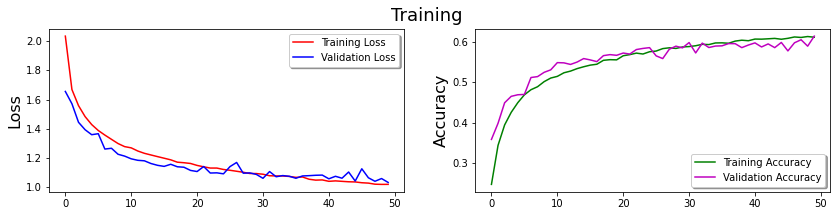

In [54]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Training', fontsize=18)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right', shadow=True)


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right',shadow=True)

plt.show()

## Evaluation by using PrivateTest

In [66]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))  # A new 1-D array initialized from text data in a string.
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [67]:
test["pixels"].values

array([array([170., 118., 101., ..., 159., 133., 131.]),
       array([ 7.,  5.,  8., ..., 72., 57., 52.]),
       array([232., 240., 241., ...,   4.,   4.,   9.]), ...,
       array([ 17.,  17.,  16., ..., 154., 133., 113.]),
       array([30., 28., 28., ..., 35., 30., 28.]),
       array([ 19.,  13.,  14., ..., 189., 199., 201.])], dtype=object)

In [68]:
x_test_private=np.vstack(test["pixels"].values)
x_test_private

array([[170., 118., 101., ..., 159., 133., 131.],
       [  7.,   5.,   8., ...,  72.,  57.,  52.],
       [232., 240., 241., ...,   4.,   4.,   9.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [71]:
y_test_private = np.array(test["emotion"])  # y_test_private = test["emotion"].values
y_test_private

array([0, 5, 6, ..., 0, 3, 2])

In [72]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [74]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("Loss and Accuracy on PrivateTest, respectively:", score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Loss and Accuracy on PrivateTest, respectively: [0.9991739988327026, 0.6230147480964661]
Test loss: 0.9991739988327026
Test accuracy: 0.6230147480964661


In [78]:
pred_prob = model.predict(x_test_private)
y_pred_private = np.argmax(pred_prob, axis=1)
y_pred_private

113/113 [==============================] - 1s 5ms/step


array([0, 4, 4, ..., 6, 3, 4])

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(np.argmax(y_test_private, axis=1), y_pred_private))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       491
           1       0.74      0.31      0.44        55
           2       0.50      0.23      0.32       528
           3       0.81      0.87      0.84       879
           4       0.45      0.63      0.53       594
           5       0.71      0.75      0.73       416
           6       0.61      0.61      0.61       626

    accuracy                           0.62      3589
   macro avg       0.62      0.56      0.57      3589
weighted avg       0.62      0.62      0.61      3589



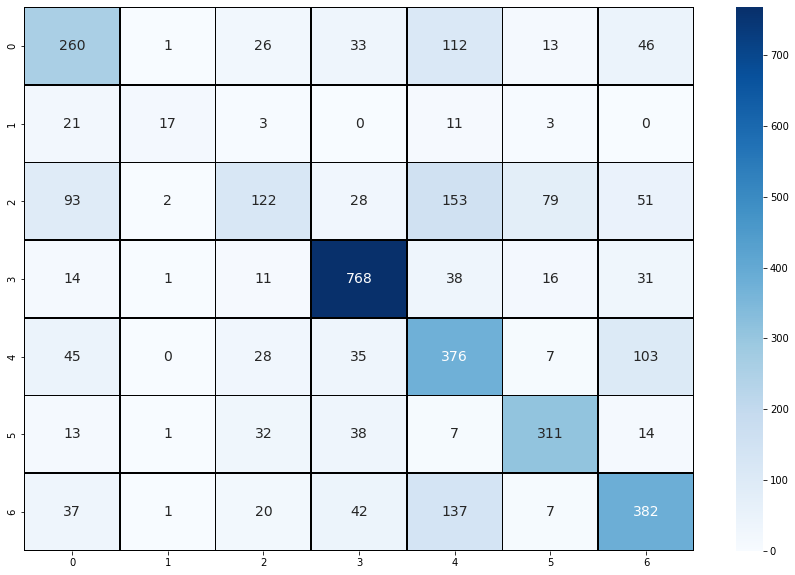

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(np.argmax(y_test_private, axis=1), y_pred_private), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14});

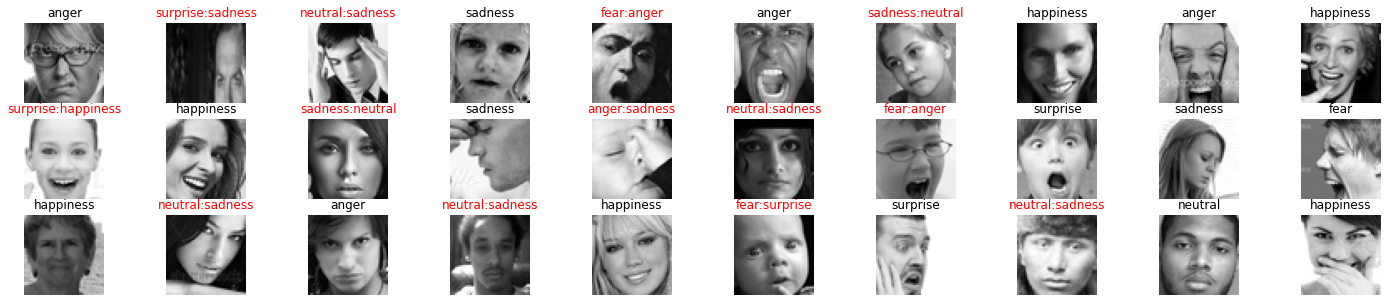

In [125]:
plt.figure(figsize=(25,5))
x, y =10, 3
for i in range(30):
  plt.subplot(y, x, i+1)
  show(x_test_private[i])
  if emotion_list[np.argmax(y_test_private[i])] != emotion_list[y_pred_private[i]]:
    plt.title(emotion_list[np.argmax(y_test_private[i])]+':'+emotion_list[y_pred_private[i]],color='#ff0000')
  else:
    plt.title(emotion_list[np.argmax(y_test_private[i])])
  plt.axis("off")